In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import pickle
from sklearn.model_selection import train_test_split   
from sklearn.ensemble import RandomForestClassifier
import warnings
from imblearn.under_sampling import RandomUnderSampler  
from sklearn.utils import resample
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
warnings.filterwarnings('ignore')

<AxesSubplot:>

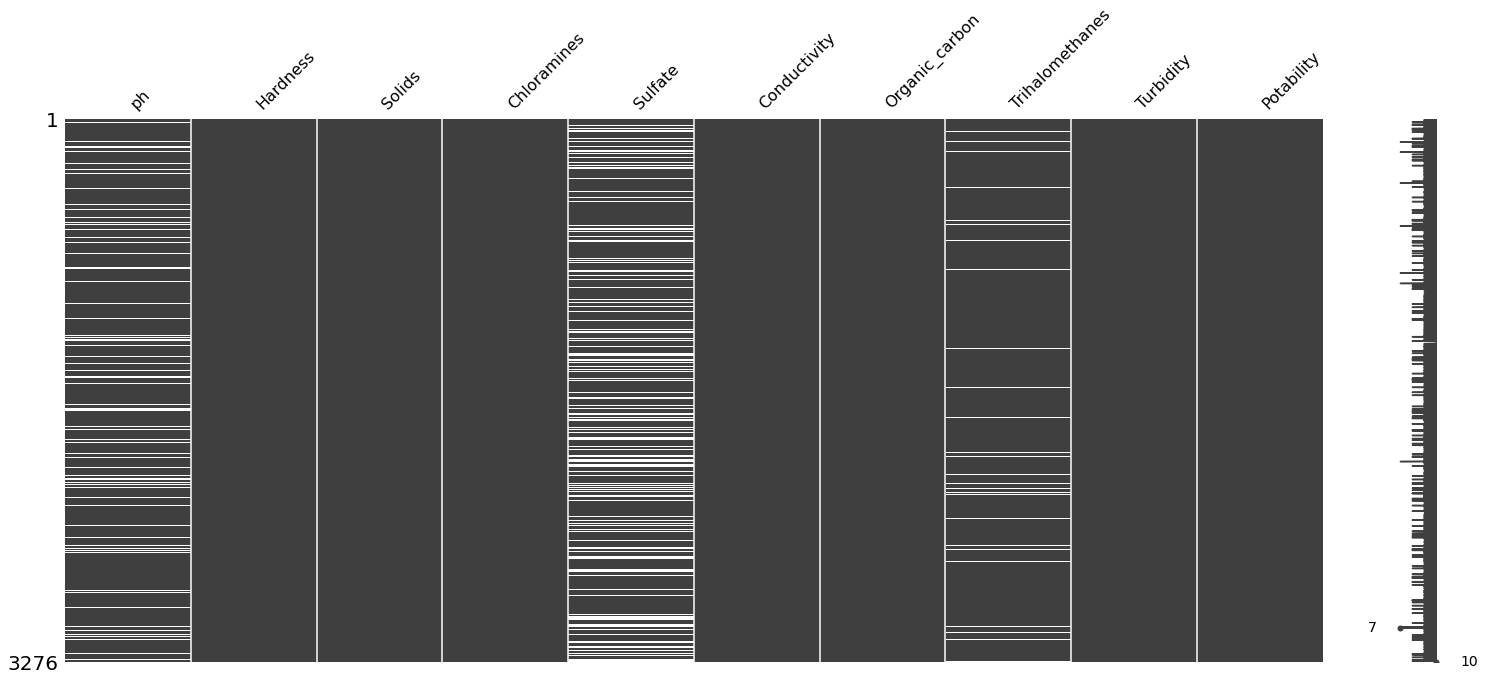

In [2]:
import missingno as msno
df=pd.read_csv(r'C:\Users\Lenovo\Desktop\water.csv')
msno.matrix(df)

In [3]:
df = df.dropna()

<AxesSubplot:>

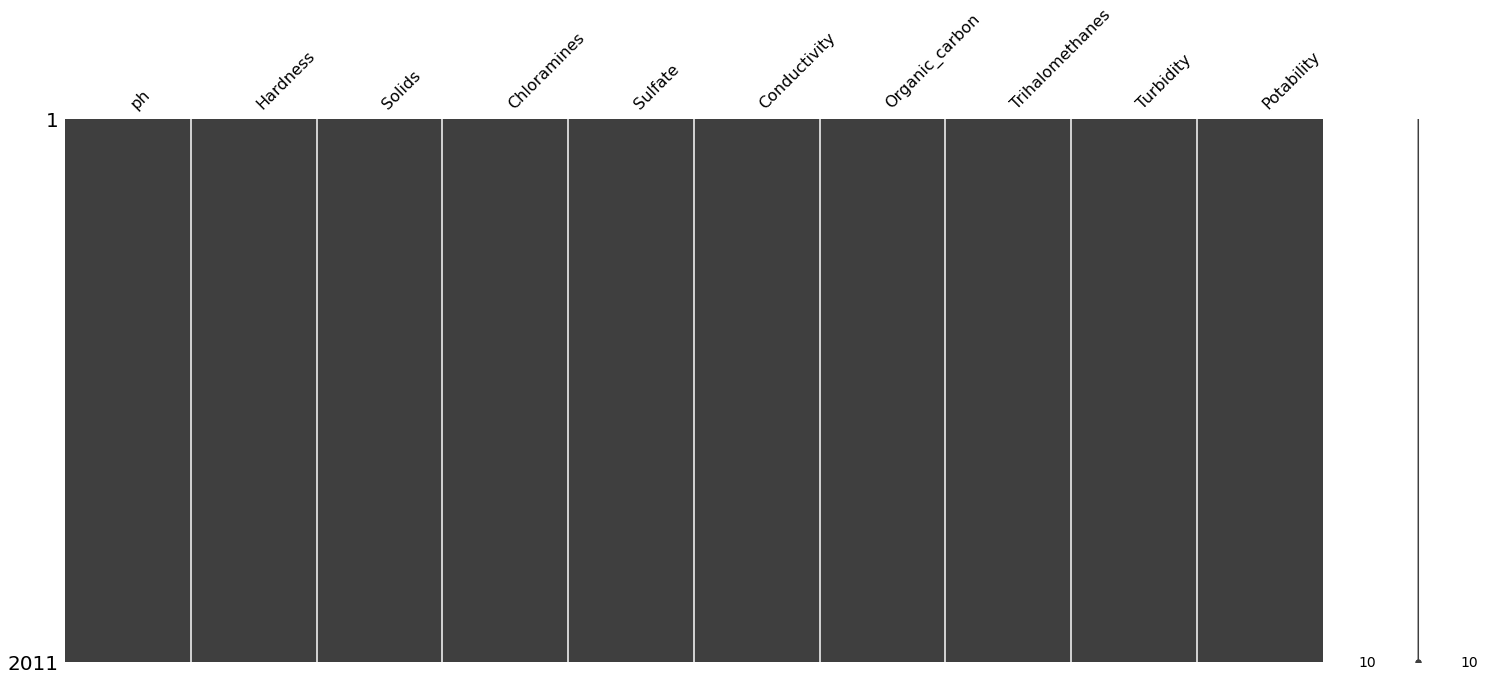

In [4]:
msno.matrix(df)

In [5]:
df.Potability.value_counts()

0    1200
1     811
Name: Potability, dtype: int64

Text(0.5, 1.0, 'Water distribution by potability')

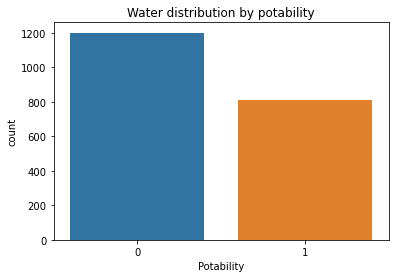

In [6]:
sns.countplot(x ='Potability', data = df).set_title("Water distribution by potability")

In [7]:
df_notpotable  = df[df['Potability']==0]
df_potable = df[df['Potability']==1] 

In [8]:
df_potable_resample = resample(df_potable, replace = True, n_samples = 1200, random_state = 0)

In [9]:
df = pd.concat([df_notpotable, df_potable_resample])


In [10]:
df.Potability.value_counts()


0    1200
1    1200
Name: Potability, dtype: int64

Text(0.5, 1.0, 'Water distribution by potability')

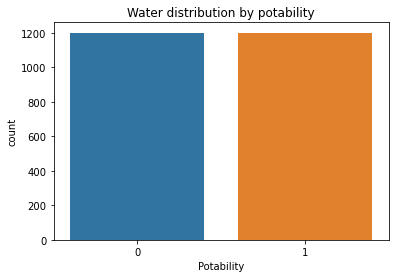

In [11]:
sns.countplot(x ='Potability', data = df).set_title("Water distribution by potability")

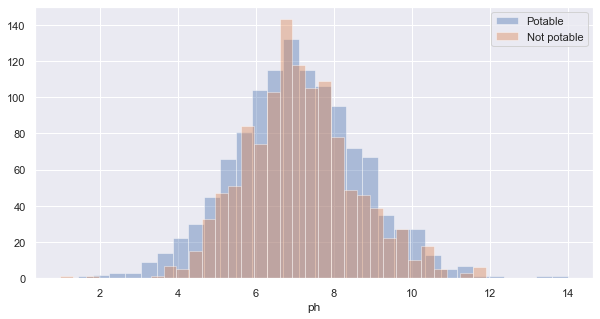

In [12]:
sns.set(rc={'figure.figsize':(10,5)})
sns.distplot(df[df["Potability"] == 0]['ph'],  kde=False, label="Potable")
sns.distplot(df[df["Potability"] == 1]['ph'],  kde=False, label="Not potable")
plt.legend()

<AxesSubplot:xlabel='ph'>

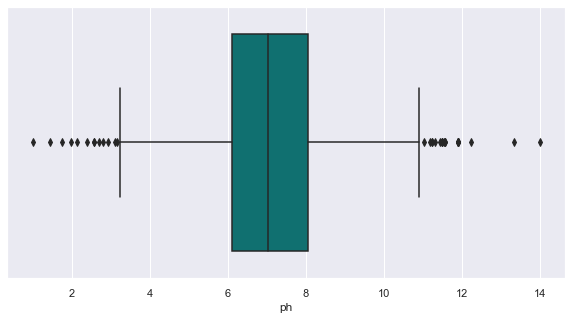

In [13]:
sns.boxplot(x = df.ph, color = 'teal')

In [14]:
upper=df['ph'].mean()+3*df['ph'].std()
lower=df['ph'].mean()-3*df['ph'].std()
df=df[(df['ph'] < upper) & (df['ph'] > lower )]

In [15]:
df['ph'].describe()

count    2385.000000
mean        7.090998
std         1.493320
min         2.558103
25%         6.104926
50%         7.022952
75%         8.040144
max        11.568768
Name: ph, dtype: float64

<AxesSubplot:xlabel='ph', ylabel='Density'>

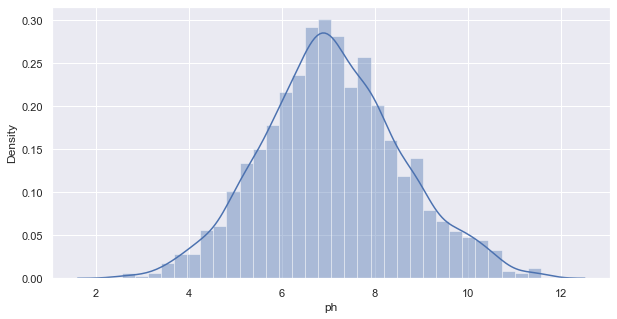

In [16]:
sns.distplot(df['ph'])

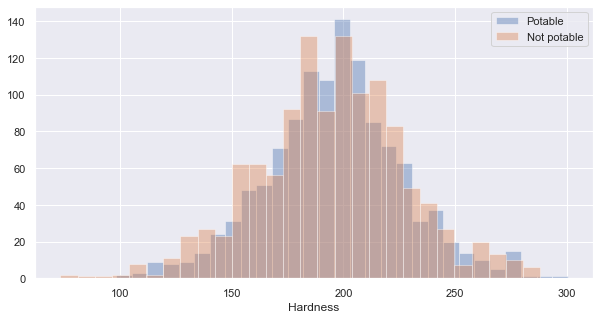

In [17]:
sns.distplot(df[df["Potability"] == 0]['Hardness'],  kde=False, label="Potable")
sns.distplot(df[df["Potability"] == 1]['Hardness'],  kde=False, label="Not potable")
plt.legend()

<AxesSubplot:xlabel='ph', ylabel='Hardness'>

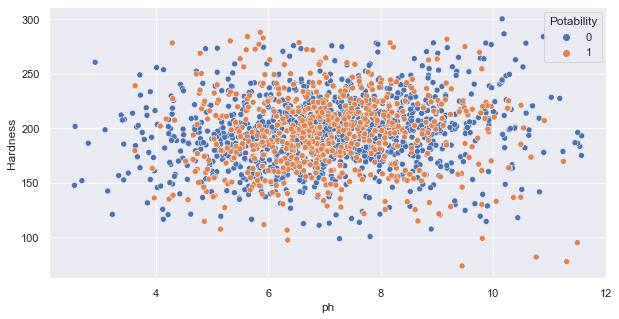

In [18]:
sns.scatterplot(x=df['ph'],y=df['Hardness'],data=df,hue='Potability')

<AxesSubplot:>

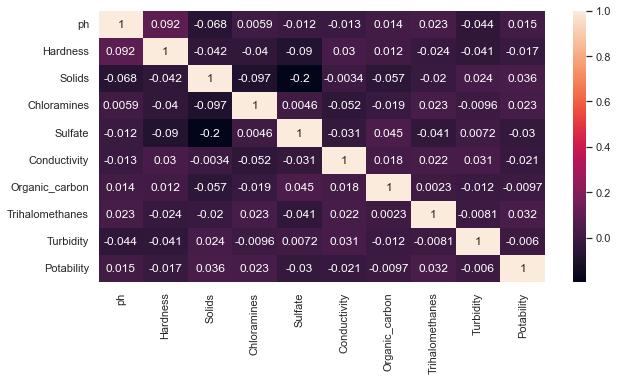

In [19]:
sns.heatmap(df.corr(), annot=True)


In [20]:
x = df.drop(['Potability'], axis = 1)
y = df['Potability']

In [21]:
st = StandardScaler()
x_columns= x.columns
x[x_columns] = st.fit_transform(x[x_columns])

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier


In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size = 0.1, random_state = 0)


In [24]:
rf = RandomForestClassifier(min_samples_leaf = 2, n_estimators = 1000, random_state = 0)


In [25]:
rf.fit(X_train, Y_train)


RandomForestClassifier(min_samples_leaf=2, n_estimators=1000, random_state=0)

In [26]:
rf_pred_test = rf.predict(X_test)
rf_pred_train = rf.predict(X_train)

In [27]:
print('RandomForest : ' + str(accuracy_score(rf_pred_test, Y_test)))


RandomForest : 0.8200836820083682


In [29]:
print('RandomForest : ' + str(accuracy_score(rf_pred_train, Y_train)))

RandomForest : 1.0


In [31]:
print(classification_report(Y_test,rf_pred_test))

              precision    recall  f1-score   support

           0       0.84      0.81      0.82       125
           1       0.80      0.83      0.82       114

    accuracy                           0.82       239
   macro avg       0.82      0.82      0.82       239
weighted avg       0.82      0.82      0.82       239



In [33]:
from sklearn import metrics
print(metrics.confusion_matrix(Y_test,rf_pred_test))

[[101  24]
 [ 19  95]]


In [34]:
rf.predict([[3.71,129.42,18630.06,6.63,356.88,418.606,16.868,66.4200,3.0255]])

array([0], dtype=int64)

# SVM

In [35]:
from sklearn.svm import SVC 
clf = SVC()
clf.fit(X_train,Y_train)

SVC()

In [36]:
svm_predict_test=clf.predict(X_test)
svm_predict_train=clf.predict(X_train)

In [37]:
print("Accuracy score is:",accuracy_score(svm_predict_test,Y_test))

Accuracy score is: 0.6903765690376569


In [38]:
print("Accuracy score is:",accuracy_score(svm_predict_train,Y_train))

Accuracy score is: 0.7739981360671015


In [39]:
print(classification_report(Y_test,svm_predict_test))

              precision    recall  f1-score   support

           0       0.68      0.76      0.72       125
           1       0.70      0.61      0.65       114

    accuracy                           0.69       239
   macro avg       0.69      0.69      0.69       239
weighted avg       0.69      0.69      0.69       239



# Logistic 

In [40]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,Y_train)

LogisticRegression()

In [41]:
Logistic_Predicted_test=lr.predict(X_test)
Logistic_Predicted_train=lr.predict(X_train)

In [42]:
print("Accuracy score is:",accuracy_score(Logistic_Predicted_test,Y_test))

Accuracy score is: 0.49372384937238495


In [43]:
print("Accuracy score is:",accuracy_score(Logistic_Predicted_train,Y_train))

Accuracy score is: 0.5060577819198508


# Decision Tree

In [44]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(X_train,Y_train)

DecisionTreeClassifier()

In [45]:
Decision_Predicted_test=dt.predict(X_test)
Decision_Predicted_train=dt.predict(X_train)

In [46]:
print("Accuracy score is:",accuracy_score(Decision_Predicted_test,Y_test))

Accuracy score is: 0.7280334728033473


In [47]:
print("Accuracy score is:",accuracy_score(Decision_Predicted_train,Y_train))

Accuracy score is: 1.0


In [48]:
Training_accuracy=[100,77,50,100]
Testing_accuracy=[82,69,49,74]
Algo=['Random Forest','SVM','Logistic','Decision Tree']

<BarContainer object of 4 artists>

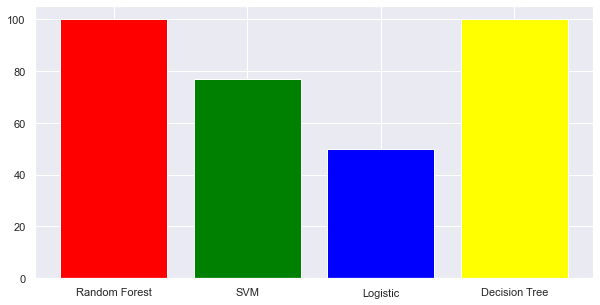

In [49]:
plt.bar(Algo,Training_accuracy,color = ['red', 'green','blue','yellow'])

<BarContainer object of 4 artists>

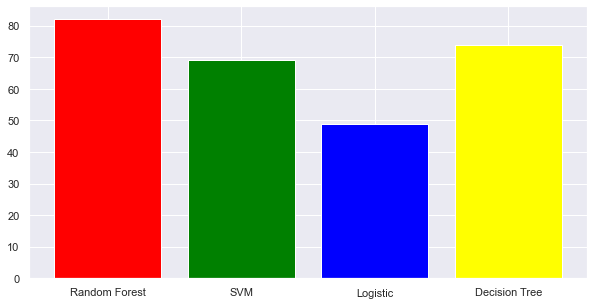

In [50]:
plt.bar(Algo,Testing_accuracy,color = ['red', 'green','blue','yellow'])